In [1]:
 # Importing necessary libraries
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler, LabelEncoder
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset

data = pd.read_csv('customer_support_tickets.csv')

In [3]:
 # Display basic info about the dataset
 
 data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [4]:
# Data Preprocessing
 # Handling missing values
    
data = data.dropna()

In [5]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Correct indentation for the for loop
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [6]:
# Check the column names in the dataset
print(data.columns)


Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [7]:
# Adjusting based on the correct column names

X = data.drop(['Ticket ID', 'Customer Satisfaction Rating'], axis=1)
y = data['Customer Satisfaction Rating']


In [8]:
 # Splitting the dataset
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
 random_state=42)

In [9]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Model Building
# Train a Random Forest Classifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predict on the test set

y_pred = rfc.predict(X_test)

In [12]:
# Model Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
 

Accuracy: 0.20577617328519857
Classification Report:
               precision    recall  f1-score   support

         1.0       0.17      0.17      0.17       168
         2.0       0.24      0.22      0.23       174
         3.0       0.24      0.26      0.25       175
         4.0       0.19      0.17      0.18       162
         5.0       0.18      0.20      0.19       152

    accuracy                           0.21       831
   macro avg       0.21      0.20      0.20       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
 [[29 41 38 27 33]
 [42 38 34 27 33]
 [37 23 45 34 36]
 [31 27 36 28 40]
 [27 29 36 29 31]]


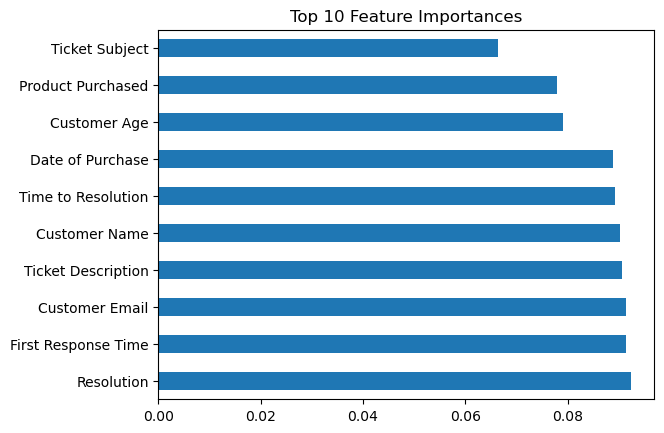

In [13]:
# Visualization of Results
# Feature Importance

feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

Note: you may need to restart the kernel to use updated packages.
